<h1>Soccer Prediction</h1>

<h2>Load Data and Initial,Exploratory Data Analysis</h2>

In [3]:
#Importing libraries
import  pandas as pd
import  numpy as np
import  seaborn as sns
import  matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

<h3>Importing and Examine DataSets

In [4]:
#Load database tables in DataFrames
with sqlite3.connect("./data/database.sqlite") as con:
    countries = pd.read_sql("SELECT * from Country", con)
    matches = pd.read_sql("SELECT * from Match", con)
    leagues = pd.read_sql("SELECT * from League", con)
    teams = pd.read_sql("SELECT * from Team", con)
    teams_stats = pd.read_sql("SELECT * from Team_Attributes", con)
    players = pd.read_sql("SELECT * from Player", con)
    player_stats = pd.read_sql("SELECT * from Player_Attributes", con)

In [5]:
#We will work mainly with 2 tables: matches and teams
matches.shape

(25979, 115)

In [6]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [7]:
teams.shape

(299, 9)

In [8]:
teams.dtypes

id                   int64
team_api_id          int64
team_fifa_api_id     int64
team_long_name      object
team_short_name     object
overall              int64
attack               int64
midfield             int64
defence              int64
dtype: object

In [9]:
#Joining Teams with teams_stats
teams=pd.merge(teams,teams_stats,how='inner', on='team_api_id')

In [10]:
teams.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,overall,attack,midfield,defence,id_y,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673,KRC Genk,GEN,72,73,73,71,485,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673,KRC Genk,GEN,72,73,73,71,486,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673,KRC Genk,GEN,72,73,73,71,487,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673,KRC Genk,GEN,72,73,73,71,488,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673,KRC Genk,GEN,72,73,73,71,489,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [11]:
#Add new field to Matches year_team (it help to concatenate to the correct Team; different teams for different years)
matches['team_year']=np.where(matches.season=='2008/2009',2010,-1)
matches['team_year']=np.where(matches.season=='2009/2010',2010,matches['team_year'])
matches['team_year']=np.where(matches.season=='2010/2011',2010,matches['team_year'])
matches['team_year']=np.where(matches.season=='2011/2012',2011,matches['team_year'])
matches['team_year']=np.where(matches.season=='2012/2013',2012,matches['team_year'])
matches['team_year']=np.where(matches.season=='2013/2014',2013,matches['team_year'])
matches['team_year']=np.where(matches.season=='2014/2015',2014,matches['team_year'])
matches['team_year']=np.where(matches.season=='2015/2016',2015,matches['team_year'])


In [12]:
#Add Team year to team
teams['team_year']=pd.to_datetime(teams.date).dt.year

In [13]:
#Create home team and away team to join to match

In [14]:
#Renaming some columns with names too long
teams_home=teams.rename(columns={
                      'overall':'home_overall',
                      'attack':'home_attack',
                      'midfield':'home_midfield',
                      'defence':'home_defence',
                      'team_long_name':'home_team_name',
                      'team_short_name':'home_team_sname', 
                      'buildUpPlaySpeed':'home_bupspeed',
                      'buildUpPlaySpeedClass':'home_bupspeedc',
                      'buildUpPlayDribbling':'home_bupdribb',
                      'buildUpPlayDribblingClass':'home_bupdribbc',
                      'buildUpPlayPassing':'home_buppass',
                      'buildUpPlayPassingClass':'home_buppassc',
                      'buildUpPlayPositioningClass':'home_bupposic',
                      'chanceCreationPassing':'home_ccpass',
                      'chanceCreationPassingClass':'home_ccpassc',
                      'chanceCreationCrossing':'home_cccross',
                      'chanceCreationCrossingClass':'home_cccrossc',
                      'chanceCreationShooting':'home_ccshoot',
                      'chanceCreationShootingClass':'home_ccshootc',
                      'chanceCreationPositioningClass':'home_ccposic',
                      'defencePressure':'home_defpress',
                      'defencePressureClass':'home_defpressc',
                      'defenceAggression':'home_defaggre',
                      'defenceAggressionClass':'home_defaggrec',
                      'defenceTeamWidth':'home_defwidth',
                      'defenceTeamWidthClass':'home_defwidthc',
                      'defenceDefenderLineClass':'home_deflinec'                     
                     },inplace=False)

#Renaming some columns with names too long
teams_away=teams.rename(columns={
                      'overall':'away_overall',
                      'attack':'away_attack',
                      'midfield':'away_midfield',
                      'defence':'away_defence',
                      'team_long_name':'away_team_name',
                      'team_short_name':'away_team_sname', 
                      'buildUpPlaySpeed':'away_bupspeed',
                      'buildUpPlaySpeedClass':'away_bupspeedc',
                      'buildUpPlayDribbling':'away_bupdribb',
                      'buildUpPlayDribblingClass':'away_bupdribbc',
                      'buildUpPlayPassing':'away_buppass',
                      'buildUpPlayPassingClass':'away_buppassc',
                      'buildUpPlayPositioningClass':'away_bupposic',
                      'chanceCreationPassing':'away_ccpass',
                      'chanceCreationPassingClass':'away_ccpassc',
                      'chanceCreationCrossing':'away_cccross',
                      'chanceCreationCrossingClass':'away_cccrossc',
                      'chanceCreationShooting':'away_ccshoot',
                      'chanceCreationShootingClass':'away_ccshootc',
                      'chanceCreationPositioningClass':'away_ccposic',
                      'defencePressure':'away_defpress',
                      'defencePressureClass':'away_defpressc',
                      'defenceAggression':'away_defaggre',
                      'defenceAggressionClass':'away_defaggrec',
                      'defenceTeamWidth':'away_defwidth',
                      'defenceTeamWidthClass':'away_defwidthc',
                      'defenceDefenderLineClass':'away_deflinec'                     
                     },inplace=False)

In [15]:
#Merging home_team, away_team (Teams) to matches
matches=pd.merge(matches,teams_home,how='inner',left_on=['home_team_api_id','team_year'],right_on=['team_api_id','team_year'])
matches=pd.merge(matches,teams_away,how='inner',left_on=['away_team_api_id','team_year'],right_on=['team_api_id','team_year'])

In [16]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date_x',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [17]:
#Removing some columns from matches
#removing columns from matches
matches.drop('date_x',axis=1,inplace=True)
matches.drop('id_x_y',axis=1,inplace=True)
matches.drop('id_y_y',axis=1,inplace=True)
matches.drop('team_fifa_api_id_x_y',axis=1,inplace=True)
matches.drop('team_fifa_api_id_y_y',axis=1,inplace=True)

list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 '

<h3>Feature engineering</h3>

In [18]:
# Overall differences between teams
matches['overall']=matches['home_overall']-matches['away_overall']

#Differences between the differents lines playing
matches['hatt_vs_adef']=matches['home_attack']-matches['away_defence']
matches['hdef_vs_aatt']=matches['home_defence']-matches['away_attack']
matches['hmid_vs_amid']=matches['home_midfield']-matches['away_midfield']

<h4>Create a new win column: 0-home team won 1-visitor team won 2-Tie</h4>

In [19]:
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])>0,0,-1)
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])<0,1,matches['win'])
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])==0,2,matches['win'])
matches['win'].head()

0    2
1    2
2    0
3    2
4    0
Name: win, dtype: int64

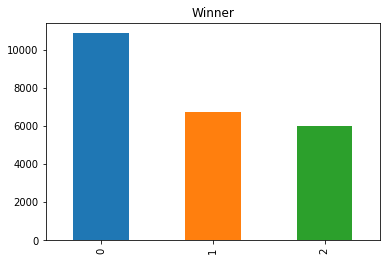

In [20]:
# Plot the win data
matches.win.value_counts().plot(kind='bar',title='Winner');

In [21]:
print("Percentage Home Wins: {0:.2%}".format(matches[matches['win']==0].win.count()/matches['win'].value_counts().sum()))
print("Percentage Visitor Wins: {0:.2%}".format(matches[matches['win']==1].win.count()/matches['win'].value_counts().sum()))
print("Percentage Tie: {0:.2%}".format(matches[matches['win']==2].win.count()/matches['win'].value_counts().sum()))

Percentage Home Wins: 46.02%
Percentage Visitor Wins: 28.64%
Percentage Tie: 25.34%


<h2>Goals</h2>

In [22]:
team_home_goals=pd.DataFrame(matches.groupby(['home_team_api_id'])['home_team_goal'].mean())
team_home_goals.rename(columns={'home_team_goal':'home_team_mean'},inplace=True)                          
team_home_goals.index.name='team_api_id'
team_home_goals.head()

,home_team_mean
team_api_id,
1601,1.209524
1773,1.538462
1957,1.514286
2033,0.910448
2182,1.742857


In [23]:
team_home_rec=pd.DataFrame(matches.groupby(['home_team_api_id'])['away_team_goal'].mean())
team_home_rec.rename(columns={'away_team_goal':'home_rec_mean'},inplace=True)                          
team_home_rec.index.name='team_api_id'
team_home_goals=team_home_goals.join(team_home_rec,how='inner')
team_home_goals['home_effec']=team_home_goals['home_team_mean']-team_home_goals['home_rec_mean']
team_home_goals.head()

,home_team_mean,home_rec_mean,home_effec
team_api_id,,,
1601,1.209524,1.009524,0.200000
1773,1.538462,1.923077,-0.384615
1957,1.514286,0.990476,0.523810
2033,0.910448,1.283582,-0.373134
2182,1.742857,0.780952,0.961905


In [24]:
team_away_goals=pd.DataFrame(matches.groupby(['away_team_api_id'])['away_team_goal'].mean())
team_away_goals.index.name='team_api_id'
team_away_goals.rename(columns={'away_team_goal':'away_team_mean'},inplace=True)
team_away_goals.head()

,away_team_mean
team_api_id,
1601,1.085714
1773,1.230769
1957,0.904762
2033,0.910448
2182,1.219048


In [25]:
team_away_rec=pd.DataFrame(matches.groupby(['home_team_api_id'])['home_team_goal'].mean())
team_away_rec.rename(columns={'home_team_goal':'away_rec_mean'},inplace=True)                          
team_away_rec.index.name='team_api_id'
team_away_goals=team_away_goals.join(team_away_rec,how='inner')
team_away_goals['away_effec']=team_away_goals['away_team_mean']-team_away_goals['away_rec_mean']
team_away_goals.head()

,away_team_mean,away_rec_mean,away_effec
team_api_id,,,
1601,1.085714,1.209524,-0.123810
1773,1.230769,1.538462,-0.307692
1957,0.904762,1.514286,-0.609524
2033,0.910448,0.910448,0.000000
2182,1.219048,1.742857,-0.523810


In [26]:
matches=pd.merge(matches,team_home_goals,left_on='home_team_api_id',right_index=True)
matches=pd.merge(matches,team_away_goals,left_on='away_team_api_id',right_index=True)

<h2>Matches descriptions</h2>

In [27]:
matches[['home_overall','home_attack','home_midfield','home_defence','away_overall','away_attack','away_midfield','away_defence']].describe()

,home_overall,home_attack,home_midfield,home_defence,away_overall,away_attack,away_midfield,away_defence
count,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000
mean,72.735949,73.275080,72.670626,72.070541,72.735270,73.274231,72.669183,72.069777
std,5.839941,6.387009,6.179148,6.104974,5.841167,6.388142,6.181631,6.106442
min,58.000000,55.000000,56.000000,55.000000,58.000000,55.000000,56.000000,55.000000
25%,68.000000,69.000000,68.000000,67.000000,68.000000,69.000000,68.000000,67.000000
50%,73.000000,73.000000,73.000000,72.000000,73.000000,73.000000,73.000000,72.000000
75%,77.000000,78.000000,77.000000,76.000000,77.000000,78.000000,77.000000,76.000000
max,86.000000,91.000000,87.000000,86.000000,86.000000,91.000000,87.000000,86.000000


In [28]:
matches[['home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','home_effec','away_effec','win']].describe()

,home_team_mean,away_team_mean,home_rec_mean,away_rec_mean,home_effec,away_effec,win
count,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000,23575.000000
mean,1.545748,1.159067,1.159067,1.545825,0.386681,-0.386758,0.793128
std,0.441231,0.328585,0.263302,0.441142,0.624709,0.217490,0.819041
min,0.533333,0.263158,0.550459,0.533333,-1.529412,-1.105263,0.000000
25%,1.261905,0.940789,0.982301,1.261905,-0.037383,-0.526316,0.000000
50%,1.445652,1.087719,1.157895,1.451128,0.289474,-0.377483,1.000000
75%,1.760331,1.308824,1.326087,1.760331,0.676471,-0.230263,2.000000
max,3.322368,2.328947,2.210526,3.322368,2.592105,0.470588,2.000000


In [29]:
# Now matematically I can demonstrate that Barcelona is the best team at least at home:
matches[['home_team_name','home_effec']].groupby('home_team_name').mean().sort_values(by='home_effec',ascending=False).head()

,home_effec
home_team_name,
FC Barcelona,2.592105
Real Madrid CF,2.355263
FC Bayern Munich,2.102941
SL Benfica,1.990826
Celtic,1.985507


<h2>Exploratory Data Analysis</h2>

In [28]:
#Sort by home_effec
matches[['home_effec','win']].sort_values(by='home_effec')

,home_effec,win
8670,-1.529412,1
8720,-1.529412,1
8874,-1.529412,1
8737,-1.529412,1
8806,-1.529412,2
8704,-1.529412,2
8771,-1.529412,1
8687,-1.529412,1
8754,-1.529412,1
8619,-1.529412,2


In [29]:
#We can see how is mean for the different outcomes (Win)
matches[['home_effec','win']].groupby('win',axis=0).home_effec.mean()

win
0    0.577047
1    0.158138
2    0.299227
Name: home_effec, dtype: float64

In [30]:
matches[['home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','home_effec','away_effec','win']].groupby('win').describe()

away_effec                                                              \
         count      mean       std       min       25%       50%       75%   
win                                                                          
0      10850.0 -0.368487  0.210951 -1.105263 -0.506579 -0.368421 -0.220183   
1       6752.0 -0.415992  0.229298 -1.105263 -0.557651 -0.419118 -0.270588   
2       5973.0 -0.386903  0.211829 -1.105263 -0.523810 -0.375000 -0.236842   

              away_rec_mean              ...    home_rec_mean            \
          max         count      mean    ...              75%       max   
win                                      ...                              
0    0.470588       10850.0  1.449680    ...         1.274510  2.210526   
1    0.470588        6752.0  1.707296    ...         1.392857  2.210526   
2    0.470588        5973.0  1.537945    ...         1.329114  2.210526   

    home_team_mean                                                    \
             count      mean       std       min       25%       50%   
win                                                                    
0          10850.0  1.672722  0.488627  0.533333  1.310924  1.582781   
1           6752.0  1.403928  0.346135  0.533333  1.197080  1.340000   
2           5973.0  1.475415  0.377293  0.533333  1.229358  1.407895   

                         
          75%       max  
win                      
0    1.967105  3.322368  
1    1.602941  3.322368  
2    1.669291  3.322368  

[3 rows x 48 columns]

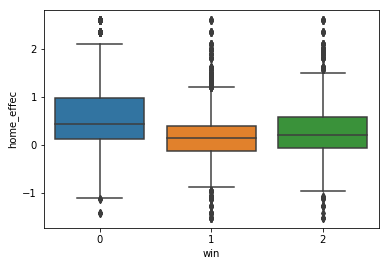

In [31]:
# let's look at this  graphically using boxplot:
sns.boxplot(x="win",y="home_effec",data=matches);

In [32]:
matches_ref=matches[['home_overall','home_attack','home_midfield','home_defence','away_overall','away_attack','away_midfield','away_defence','home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','home_effec','away_effec','hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','win']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f725bcb6828>,
      dtype=object)

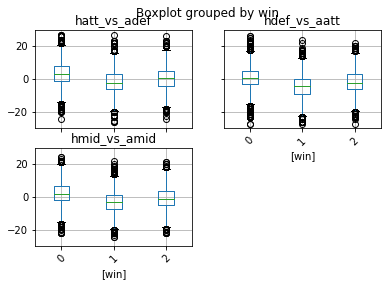

In [33]:
matches[['hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','win']].boxplot(by='win',rot=45)

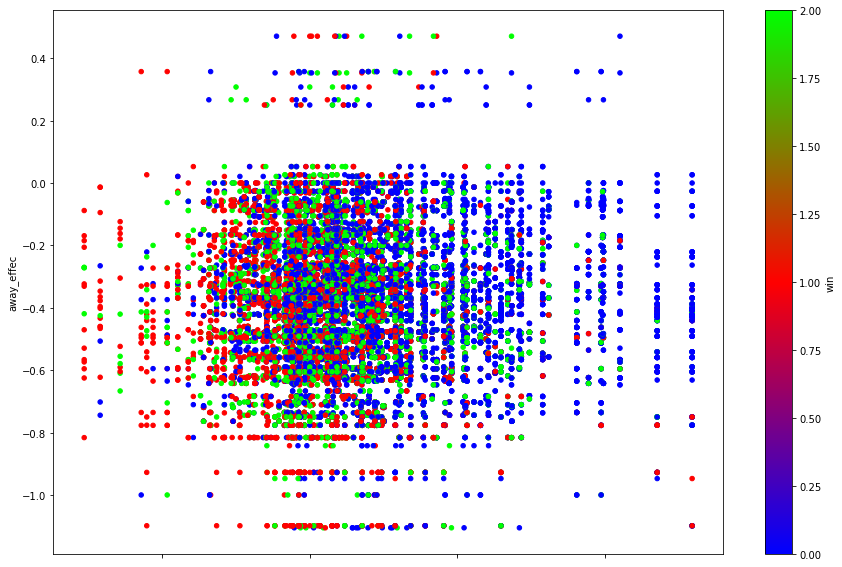

In [34]:
matches.plot(kind='scatter', 
          x='home_effec',
          y='away_effec',  
          c='win', 
          colormap='brg',figsize=(15,10));

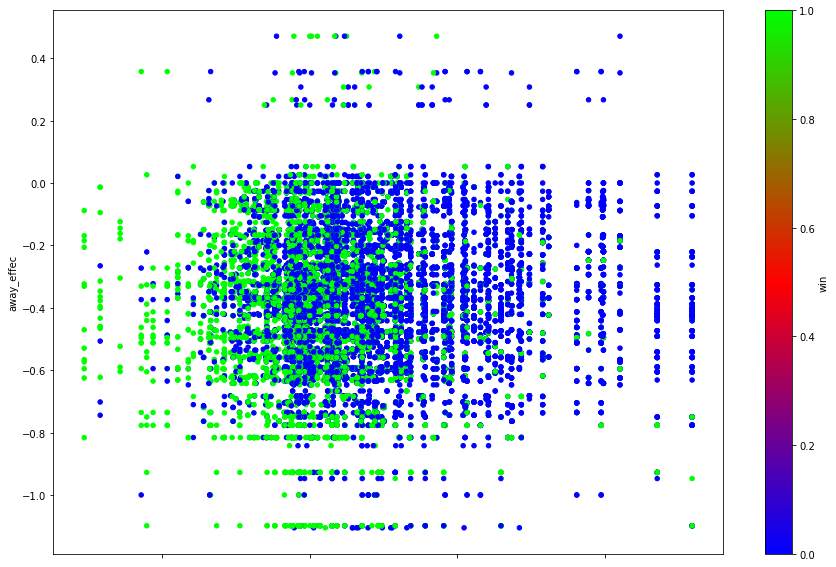

In [35]:
matches[matches['win']!=2].plot(kind='scatter', 
          x='home_effec',
          y='away_effec',  
          c='win', 
          colormap='brg',figsize=(15,10));

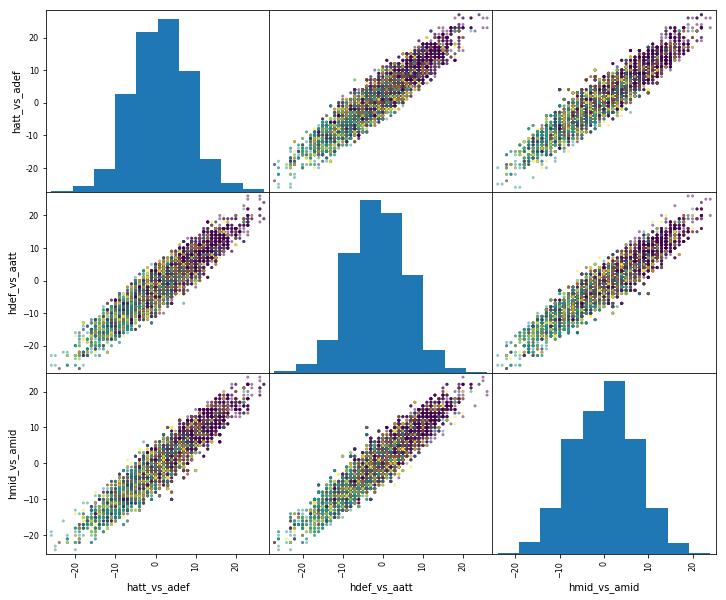

In [36]:
pd.plotting.scatter_matrix(matches[['hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','win']].drop('win', axis=1), 
                           c=matches[['hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','win']].win, figsize=(12, 10));

<h2>K-Nearest Neighbours</h2>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X=matches[['home_effec','hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','home_team_mean']]
y=matches['win']

In [32]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=99)

#Feature Scaling (Standarize)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [40]:
for i in range(10,500,10):
    #k=50
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    
    y_pred_class = knn.predict(X_test)
    print("k=",i)
    print((metrics.accuracy_score(y_test, y_pred_class)))

k= 10
0.47964031218187986
k= 20
0.4884628435697319
k= 30
0.502035968781812
k= 40
0.5030539531727181
k= 50
0.504580929759077
k= 60
0.505938242280285
k= 70
0.5128944689514761
k= 80
0.5111978282999661
k= 90
0.5142517814726841
k= 100
0.513742789277231
k= 110
0.5147607736681371
k= 120
0.5167967424499491
k= 130
0.5181540549711571
k= 140
0.5181540549711571
k= 150
0.5184933831014591
k= 160
0.5186630471666102
k= 170
0.5203596878181201
k= 180
0.5203596878181201
k= 190
0.5183237190363081
k= 200
0.5196810315575161
k= 210
0.5195113674923652
k= 220
0.5174753987105531
k= 230
0.5166270783847982
k= 240
0.5174753987105531
k= 250
0.5188327112317611
k= 260
0.5198506956226672
k= 270
0.5217170003393281
k= 280
0.5206990159484222
k= 290
0.5213776722090261
k= 300
0.5210383440787242
k= 310
0.5210383440787242
k= 320
0.5190023752969121
k= 330
0.5190023752969121
k= 340
0.5186630471666102
k= 350
0.5188327112317611
k= 360
0.5191720393620631
k= 370
0.5173057346454021
k= 380
0.5181540549711571
k= 390
0.517475398710553

In [41]:
 #k=290
knn=KNeighborsClassifier(n_neighbors=290)
knn.fit(X_train,y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5213776722090261


In [42]:
knn.predict_proba(X)

array([[0.76896552, 0.07586207, 0.15517241],
       [0.76896552, 0.07586207, 0.15517241],
       [0.76896552, 0.07586207, 0.15517241],
       ...,
       [0.34827586, 0.43448276, 0.21724138],
       [0.17241379, 0.57931034, 0.24827586],
       [0.17241379, 0.57931034, 0.24827586]])

In [43]:
accuracies = []
for k in range(10,500,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    accuracy = float(sum(pred == y)) / len(y)
    accuracies.append([k, accuracy])

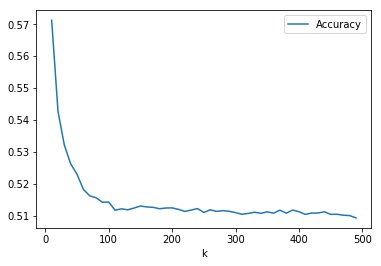

In [44]:
data = pd.DataFrame(accuracies,columns=['k','Accuracy'])
data.plot.line(x='k',y='Accuracy');

In [45]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(10,500,2))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [46]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [47]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
498,0.482355,0.489113
496,0.482355,0.489282
494,0.482525,0.489056
492,0.482355,0.489169
490,0.482694,0.489169


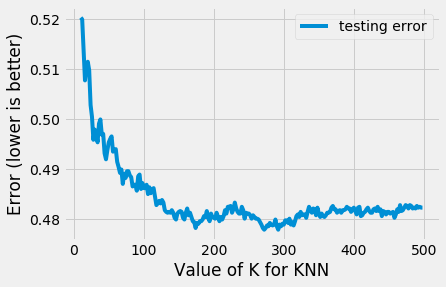

In [48]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [49]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,testing error,training error
K,,
292,0.477944,0.485097
272,0.477944,0.485606
270,0.478283,0.485549
274,0.478283,0.485776
174,0.478283,0.484022


In [50]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.4779436715303699, 272)

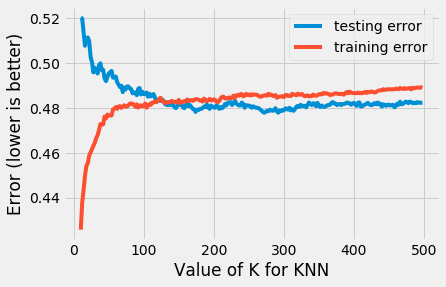

In [51]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [52]:
knn=KNeighborsClassifier(n_neighbors=272)
knn.fit(X_train,y_train)    
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5220563284696301


<h2>Logistic Regresion</h2>

In [53]:
#Fitting Logistic Reegresion to the Training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
#Predicting the Test set results
y_pred= classifier.predict(X_test)

In [55]:
print((metrics.accuracy_score(y_test, y_pred)))

0.5159484221241941


<h2>Random Forest</h2>

In [58]:
###### Fitting Random Forest Classidication to the training set
from sklearn.ensemble import RandomForestClassifier

X=matches[['home_overall','home_attack','home_midfield','home_defence','away_overall','away_attack','away_midfield','away_defence','home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','home_effec','away_effec','hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','home_bupspeed','away_bupspeed','home_buppass','away_buppass','home_ccpass','away_ccpass']]
y=matches['win']

X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=99)

#Feature Scaling (Standarize)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

classifier= RandomForestClassifier(n_estimators=1000, max_features=12,oob_score=True,random_state=1)

classifier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [59]:
#Predicting the Test set results
y_pred= classifier.predict(X_test)

In [60]:
print((metrics.accuracy_score(y_test, y_pred)))

0.46216491347132677


In [61]:
pd.DataFrame({'feature':['home_overall','home_attack','home_midfield','home_defence','away_overall','away_attack','away_midfield','away_defence','home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','home_effec','away_effec','hatt_vs_adef','hdef_vs_aatt','hmid_vs_amid','home_bupspeed','away_bupspeed','home_buppass','away_buppass','home_ccpass','away_ccpass'],'importance':classifier.feature_importances_}).sort_values(by='importance')

,feature,importance
0,home_overall,0.015798
4,away_overall,0.016920
2,home_midfield,0.017840
3,home_defence,0.018388
1,home_attack,0.019013
7,away_defence,0.019369
6,away_midfield,0.019480
5,away_attack,0.020003
13,away_effec,0.038716
10,home_rec_mean,0.039704


In [41]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 '